In [50]:
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
# used to access public financial data from the Internet and import it into Python as a DataFrame.
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date, datetime


import requests
from bs4 import BeautifulSoup

# **1. Understanding Data-Driven Decisions data pulls**

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=20
Period for indexes: 1954-04-20 to 2024-04-20 


## 1.1 Gross domestic product (GDP)

Gross Domestic Product (GDP) is a measure of the economic activity within a country. It represents the total dollar value of all goods and services produced over a specific time period within a nation's borders. GDP can be used as an indicator of the economic health of a country, its size, and growth rate.

$$
GDP = Consumption + Investment + Government Spending + Net Exports
$$

where `Consumption` refers to the total value of all goods and services consumed by households within a country. `Investment` refers to the purchase of physical assets such as machinery, equipment, and buildings that are used for producing other goods and services. `Government Spending` includes all government expenditures on final goods and services. `Net Exports` is calculated as the difference between a country's total exports and total imports ($NX = Exports - Imports$).


Let's retrieve and process the data related to the U.S. potential GDP (GDPPOT) from the Federal Reserve Economic Data (FRED) using `pandas_datareader`. After loading the data, we calculate the year-over-year (YoY) and quarter-over-quarter (QoQ) growth rates of potential GDP. For the YoY calculation, we use `shift(4)` because the data are reported quarterly, and shifting by 4 quarters corresponds to one full year, allowing us to compare the GDP of the same quarter in successive years. For the QoQ calculation, we use `shift(1)` to compare the GDP with the immediately preceding quarter, providing insight into short-term economic changes.

In [44]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
# get data from Federal Reserve Economic Data (fred)
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.005442
2023-07-01,22369.71,0.021719,0.005551
2023-10-01,22495.19,0.022190,0.005609
2024-01-01,22618.15,0.022251,0.005466
2024-04-01,22739.00,0.022151,0.005343


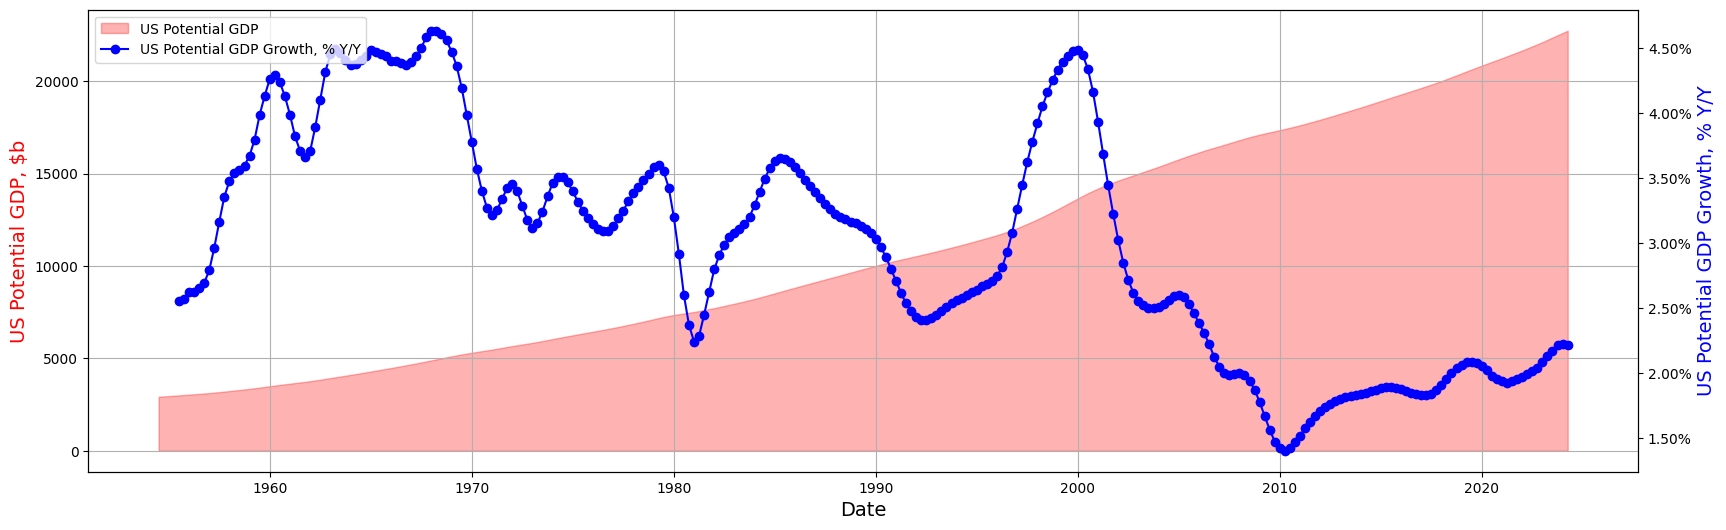

In [7]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

The U.S. Potential GDP (Red Area) represents the potential GDP of the U.S. in billions of chained 2012 dollars and the U.S. Potential GDP Growth, Year-over-Year (Blue Line)  indicates the year-over-year growth rate percentage of the potential GDP. 

The Potential GDP is a theoretical construct that estimates the maximum output an economy can sustain over the long term without increasing inflation. It doesn't reflect actual economic output, which can fluctuate due to short-term factors like business cycles, policy changes, and other economic shocks. Instead, potential GDP follows a smoother, more gradual path that represents the trend in the economy's capacity for production over time.

On the other hand, the Year-by-Year Growth Rate measures the actual change in GDP from one year to the next. This is a real-world measurement that captures the ups and downs of economic activity and reflects how quickly the economy is growing or contracting. The year-by-year fluctuations will thus show the impact of economic cycles, including recessions and expansions.

## 1.2 Inflation - CPI Core

The Consumer Price Index (CPI) is an economic indicator that measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. It's one of the most widely used statistics for identifying periods of inflation or deflation in an economy.

In [28]:

# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)


Let's calculates the year-over-year (YoY) and month-over-month (MoM) percentage change of a Consumer Price Index (CPI) series that excludes food and energy prices, often referred to as the "core" CPI.

By using the shift function in pandas, we adjust the CPI data alignment to perform temporal comparisons. Specifically, shift(12) moves each index value down by 12 rows, matching it with the value from one year prior. This setup allows us to calculate the year-over-year change in the CPI index using:

In [9]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-03-01,305.112,0.055601,0.003249
2023-04-01,306.539,0.055157,0.004677
2023-05-01,307.646,0.053322,0.003611
2023-06-01,308.245,0.048552,0.001947
2023-07-01,308.945,0.047076,0.002271
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080


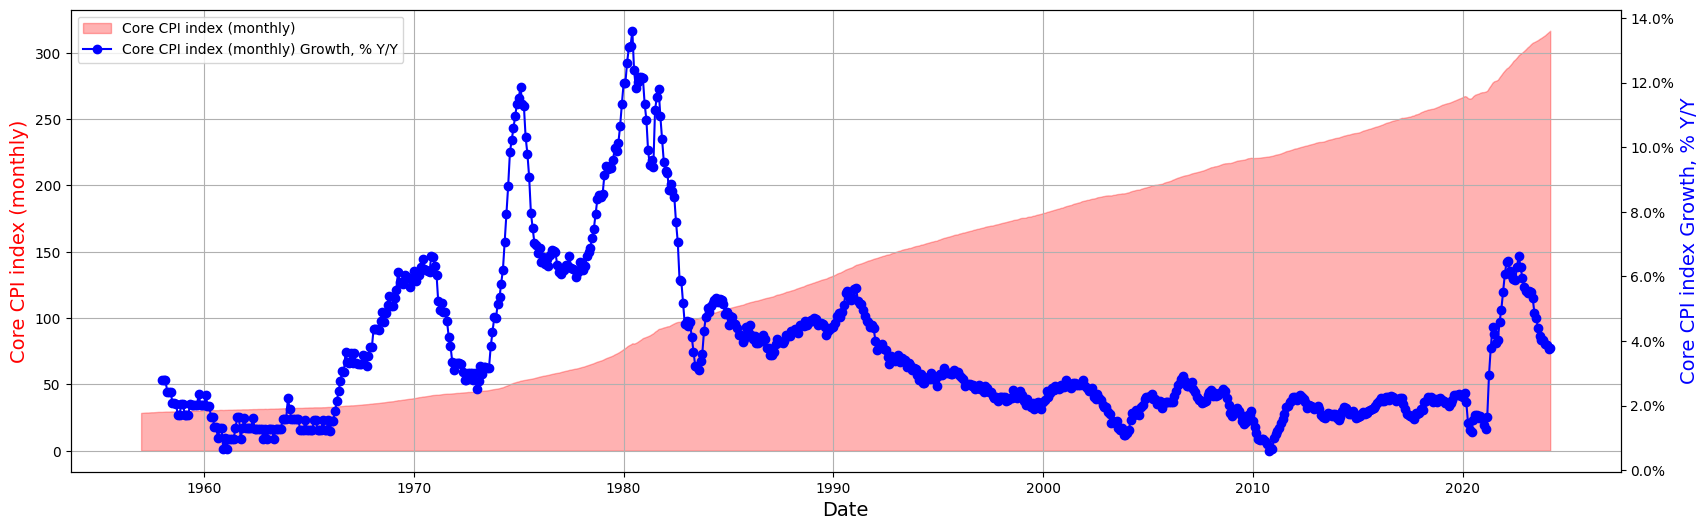

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


The red shaded area illustrates the Core CPI values over time. Core CPI typically excludes food and energy prices due to their volatility. An increasing shaded area reflects a rise in the index, indicating that the prices of goods and services in the basket are, on average, increasing.

The blue line indicates the year-over-year growth rate of the Core CPI. This growth rate is calculated as the percentage change in the Core CPI from the same month in the previous year. The Peaks might indicate times when prices were rising more rapidly, potentially due to economic overheating, supply constraints, or other inflationary pressures. Troughs, conversely, could correspond to periods of economic recession or slower price growth.

## 1.3 Interest rates

tt's the price paid for the use of borrowed money, or, in the case of deposits and investments, it is the price earned for lending money. interest rates are determined by the lender and agreed upon by the borrower. The lender could be a bank, a financial institution, or an individual. The borrower could be an individual, a business, or a government.

In many economies, the central bank sets a key interest rate, which influences the overall economy's borrowing and lending rates. This key rate is often referred to as the "base rate" or "benchmark rate."

Types of Interest Rates:

- Fixed Rate: The interest rate remains constant throughout the life of the loan or deposit.

- Variable Rate: The interest rate can change over the period based on underlying benchmarks or indices.

The Federal Funds rate is the interest rate at which depository institutions (banks and credit unions) lend reserve balances to other depository institutions overnight on an uncollateralized basis. This rate is important because it's the benchmark for many other interest rates, including loans, mortgages, and savings, and it is a key tool used by the United States Federal Reserve (commonly known as the Fed) to regulate monetary policy.

In [11]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail()
     


,FEDFUNDS
DATE,
2023-11-01,5.33
2023-12-01,5.33
2024-01-01,5.33
2024-02-01,5.33
2024-03-01,5.33


Historical Federal Funds Rate over time. The Federal Funds Rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight.

The chart illustrates the long-term trends in U.S. monetary policy. For example, the high interest rates in the late 1970s and early 1980s correspond to the Fed’s efforts to combat high inflation during that period.

Lower rates typically indicate periods when the Fed was trying to stimulate the economy, such as after the 2008 financial crisis and during the economic downturn caused by the COVID-19 pandemic.

 There are periods of high volatility, with rates quickly increasing or decreasing, reflecting the Federal Reserve's reactions to various economic pressures.

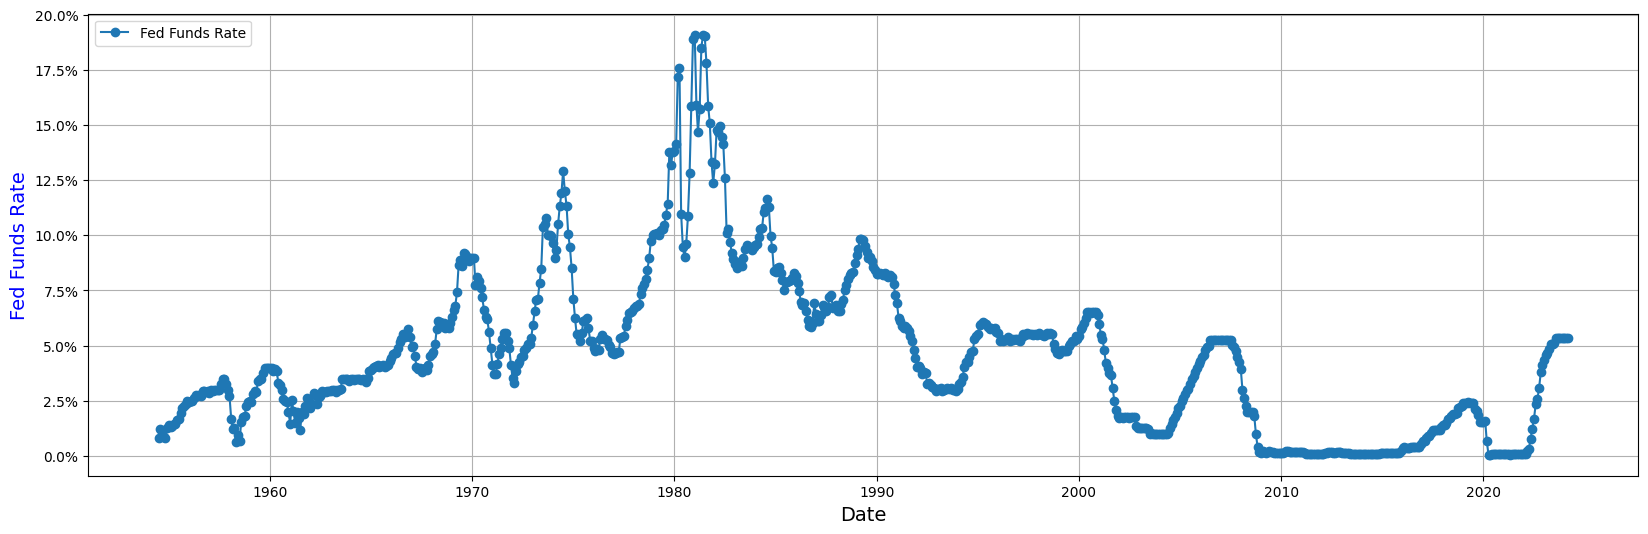

In [12]:

# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

The DGS1 series represents the daily interest rate on 1-year Treasury securities (bills, notes, and bonds), also known as the "1-Year Treasury Constant Maturity Rate." These rates are a snapshot of the yield investors would earn by purchasing a 1-year Treasury security on those specific dates, and they reflect the return investors demand for lending money to the U.S. government over a one-year period.

In [13]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2024-04-12,5.13
2024-04-15,5.16
2024-04-16,5.18
2024-04-17,5.16
2024-04-18,5.18


In [14]:
#Other rates for US Treasury: https://fred.stlouisfed.org/categories/115

#    https://fred.stlouisfed.org/series/DGS2
#    https://fred.stlouisfed.org/series/DGS3
#    https://fred.stlouisfed.org/series/DGS5
#    https://fred.stlouisfed.org/series/DGS10 

# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2024-04-12,4.54
2024-04-15,4.65
2024-04-16,4.69
2024-04-17,4.62
2024-04-18,4.68


## 1.4 S&P500

S&P500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. 

In [15]:


# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()
     


,Open,High,Low,Close,Volume
Date,,,,,
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.727319e+09
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09
2024-04-16,5064.59,5079.84,5039.83,5051.41,2.347350e+09
2024-04-15,5149.67,5168.43,5052.47,5061.82,2.319452e+09


In [16]:

# 252 trading days a year
  # REVERSE ORDER OF THE DATA
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.727319e+09,-0.008759,0.026327,0.195621
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09,-0.002208,0.048145,0.206083
2024-04-17,5068.97,5077.96,5007.25,5022.21,2.295628e+09,-0.005781,0.059715,0.209786
2024-04-16,5064.59,5079.84,5039.83,5051.41,2.347350e+09,-0.002057,0.059889,0.220843
2024-04-15,5149.67,5168.43,5052.47,5061.82,2.319452e+09,-0.012021,0.058110,0.220828


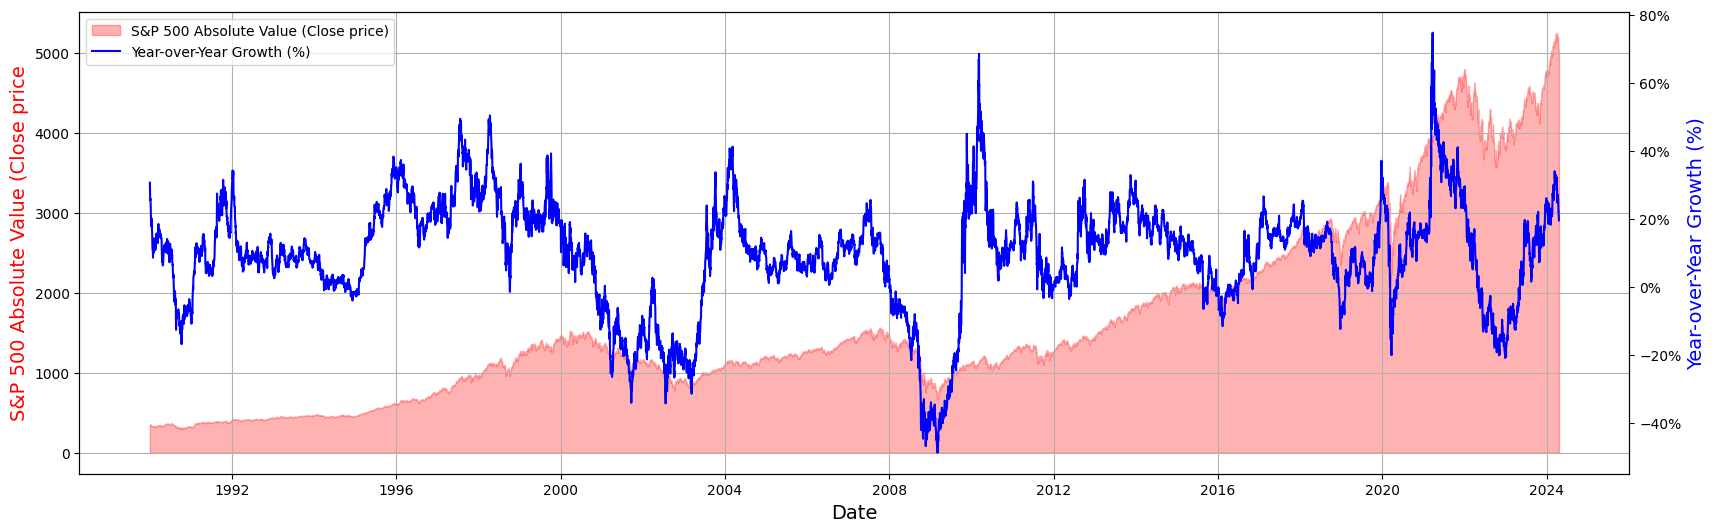

In [18]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# **2 Data Sources for Stocks**

## 2.1 (Open-High-Low-Close-Volume) OHLCV data daily - INDEXES

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
2024-04-17,17764.029297,17907.580078,17731.789062,17770.019531,17770.019531,55970700,15881.660156,0.118902
2024-04-18,17775.410156,17863.320312,17716.919922,17837.400391,17837.400391,60700500,15863.950195,0.124398
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700,15872.129883,0.117516
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400,15795.730469,0.130736
2024-04-23,17861.199219,18093.599609,17861.199219,18081.910156,18081.910156,0,15800.450195,0.144392


<Axes: xlabel='Date'>

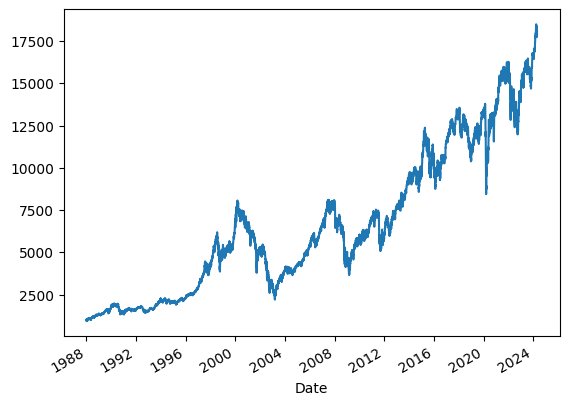

In [80]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
dax_daily = yf.download(tickers = "^GDAXI",
                        period = "max",
                        interval = "1d")

# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

display(dax_daily.tail())
dax_daily['Adj Close'].plot.line()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

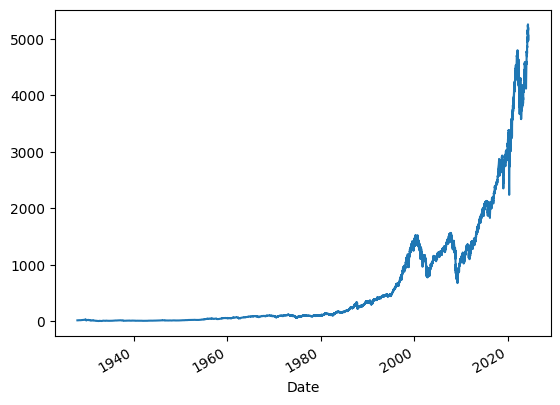

In [82]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
snp500_daily = yf.download(tickers = "^SPX",
                            period = "max",
                            interval = "1d")

snp500_daily['Adj Close'].plot.line()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

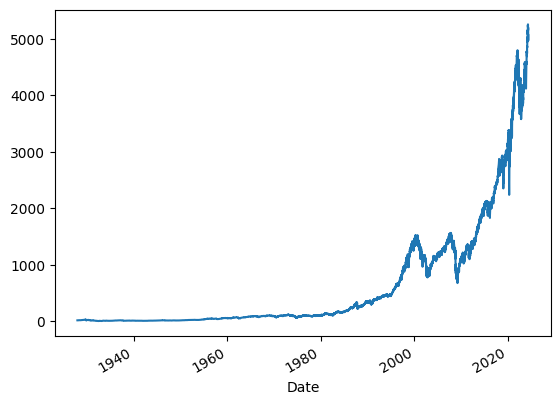

In [83]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                        period = "max",
                        interval = "1d")

snp500_daily_non_delayed['Adj Close'].plot.line()


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

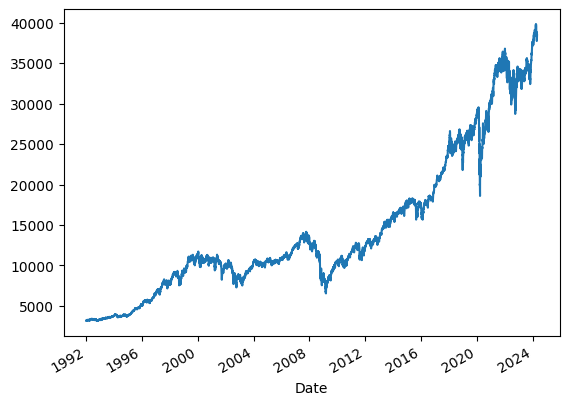

In [84]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                        period = "max",
                        interval = "1d")

dji_daily['Adj Close'].plot.line()

## 2.2. OHLCV data daily - ETFs

ETFs are investment funds that are traded on stock exchanges, much like individual stocks. They typically track an index, commodity, bonds, or a basket of assets. Unlike mutual funds, shares in an ETF can be bought and sold throughout the trading day at market price.

In [92]:

# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                        period = "max",
                        interval = "1d")

[*********************100%%**********************]  1 of 1 completed


The difference between the "Close" and "Adjusted Close" (Adj Close) prices can provide insights into various corporate actions including dividends, stock splits, and rights offerings. Let's analyze how the ETF's price was adjusted on specific dates for changes between the Close and Adj Close prices.

In [87]:
# find dividends impact on Close vs. Adj.Close
dividends_impact = epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')].copy()
display(dividends_impact)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [90]:
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


In [85]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions().head()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

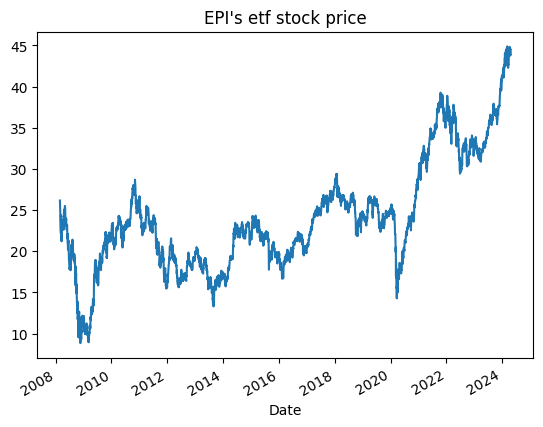

In [91]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html
epi_etf_daily['Close'].plot(title="EPI's etf stock price")


## 2.3 Macroeconomics

Macroeconomics deals with the economy as a whole or its large sectors and segments. It encompasses the analysis of key indicators that reflect the economic status and trends of a country. Let's analyze some critical indicators from a country's economy:

- **Gold Reserve**: The gold reserve of a country is a key indicator of financial health and its ability to stabilize its currency.

<Axes: xlabel='DATE'>

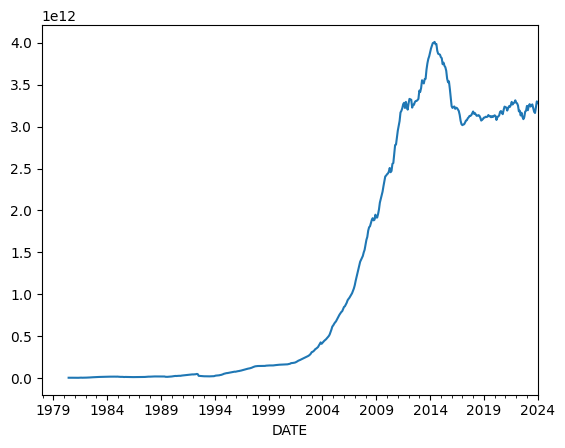

In [99]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)
gold_reserves.TRESEGCNM052N.plot.line()


- **Gold ETF Volatility**: CBOE Gold ETF Volatility Index (GVZCLS) measures the market's expectation of 30-day volatility of gold ETF prices based on options trading.

<Axes: xlabel='DATE'>

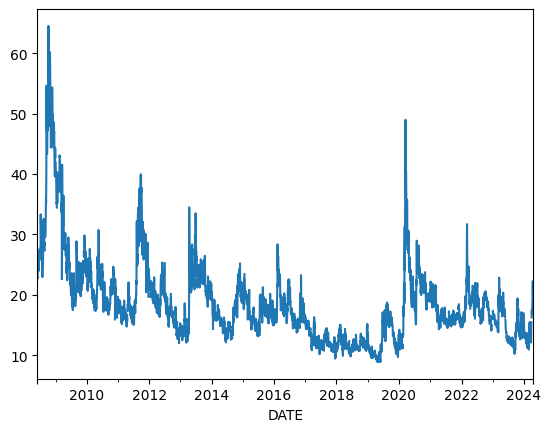

In [100]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)
gold_volatility.GVZCLS.plot.line()

- **Crude Oil Prices**: Oil prices are a crucial economic indicator as they affect global economic conditions. Let's plot WTI crude oil prices and analyze the "negative price" that occurred in April 2020 when WTI futures fell below zero due to storage capacity issues because of the COVID-19 pandemic.

<Axes: xlabel='DATE'>

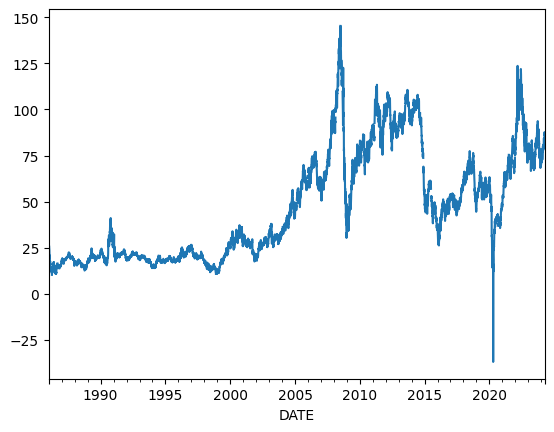

In [101]:

#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [105]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    display(df.head())
else:
    print("Failed to retrieve data from the webpage.")

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,106.0,106.0,165.0,70.7,NaN,Apr/24
1,Stock Market,5068.0,5011.0,5268.0,4.4,points,Apr/24
2,GDP Growth Rate,3.4,4.9,34.8,-28.0,percent,Dec/23
3,GDP Annual Growth Rate,3.1,2.9,13.4,-7.5,percent,Dec/23
4,Unemployment Rate,3.8,3.9,14.9,2.5,percent,Mar/24


## 2.4 Web Scraping - company info for clustering

In [96]:

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("data/global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [98]:
global_stocks = pd.read_csv("data/global_stocks.csv")
global_stocks.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Microsoft,MSFT,3026046681088,407.250,United States
1,2,Apple,AAPL,2564493410304,166.074,United States
2,3,NVIDIA,NVDA,2052299948032,820.920,United States
3,4,Alphabet (Google),GOOG,1979224686592,160.090,United States
4,5,Saudi Aramco,2222.SR,1942781652178,8.030,Saudi Arabia


# **3. Homework**

### **Question 1: [Macro] Average growth of GDP in 2023**

What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [51]:
# Download the GDP data
gdpc1 = pdr.DataReader("GDPC1", "fred")

gdpc1['gcpc1_us_yoy'] = np.round((gdpc1['GDPC1'] / gdpc1['GDPC1'].shift(4) - 1) * 100, 2)
gdpc1_2023 = gdpc1['gcpc1_us_yoy']['2023']
average_growth_2023 = np.round(gdpc1_2023.mean(), 1)

print(f"The average YoY growth rate for GDPC1 in 2023: {average_growth_2023}%.")

The average YoY growth rate for GDPC1 in 2023: 2.5%.


### **Question 2. [Macro] Inverse "Treasury Yield"**

**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**


Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2,
 https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [75]:
dgs2 = pdr.DataReader("DGS2", "fred")
dgs10 = pdr.DataReader("DGS10", "fred")
dgs_join = dgs2.join(dgs10, on = 'DATE', how = 'inner').reset_index()
dgs_join['yield_diff'] = round(dgs_join['DGS10'] - dgs_join['DGS2'], 1)
dgs_join = dgs_join[dgs_join['DATE'] >= '2020-01-01']

min_yield_diff = dgs_join['yield_diff'].min()
print(f"The minimum value of (DGS10 - DGS2): {min_yield_diff}.")

The minimum value of (DGS10 - DGS2): -1.1.


The minimum value of DGS10−DGS2DGS10−DGS2 being -1.1 indicates a situation where long-term debt instruments (10-year Treasury bonds) yield less than short-term debt instruments (2-year Treasury notes) of the same credit quality. This condition, known as an inverted yield curve, is unusual because typically, the longer the investment's time horizon, the higher the yield should be, reflecting the greater risk. An inverted yield curve is often considered a predictor of economic recession. This inversion highlights financial market concerns, suggesting investor pessimism about the near-term economic prospects.

### **Question 3. [Index] Which Index is better recently?**

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

In [116]:
start_date = "2019-04-09"
end_date = "2024-04-09"

gspc = yf.download("^GSPC", start=start_date, end=end_date)
mxx = yf.download("^MXX", start=start_date, end=end_date)

# Calculate the growth rate % from last 5 years
gspc_growth = ((gspc['Adj Close'].iloc[-1] / gspc['Adj Close'].iloc[0]) - 1) * 100
mxx_growth = ((mxx['Adj Close'].iloc[-1] / mxx['Adj Close'].iloc[0]) - 1) * 100

print("GSPC growth over 5 years:", round(gspc_growth), "%")
print("MXX growth over 5 years:", round(mxx_growth), "%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

GSPC growth over 5 years: 81 %
MXX growth over 5 years: 28 %


### **Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks**


**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**


Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [117]:
# List of stock tickers
tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]

# Start and end dates
start_date = "2023-01-01"
end_date = "2023-12-31"

results = {}
for ticker in tickers:

    data = yf.download(ticker, start=start_date, end=end_date)
    
    if not data.empty:
        # max and min of Adjusted Close prices
        max_price = data['Adj Close'].max()
        min_price = data['Adj Close'].min()
        

        metric = (max_price - min_price) / max_price
        rounded_metric = round(metric, 2)
        
        # Store the result in the dictionary
        results[ticker] = rounded_metric
    else:
        results[ticker] = 'No data available'

# Print the results
for ticker, result in results.items():
    print(f"{ticker}: {result}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

2222.SR: 0.21
BRK-B: 0.21
AAPL: 0.37
MSFT: 0.42
GOOG: 0.39
JPM: 0.28


This is important because a stock nearing its 52-week high may be seen as potentially overvalued or reaching a resistance level, while one near its low may be viewed as undervalued, assuming other fundamentals are strong.

In [124]:
df_stocks = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    
    if not data.empty:
        current_price = data['Adj Close'].iloc[-1]
        week_52_high = data['Adj Close'].max()
        week_52_low = data['Adj Close'].min()
        
        # Proximity to high and low
        proximity_to_high = ((week_52_high - current_price) / week_52_high) * 100
        proximity_to_low = ((current_price - week_52_low) / week_52_low) * 100
        
        # Prepare the data for DataFrame creation
        df_data = {
            'Ticker': ticker,
            'Current Price': current_price,
            '52-Week High': week_52_high,
            '52-Week Low': week_52_low,
            'Proximity to High (%)': round(proximity_to_high, 2),
            'Proximity to Low (%)': round(proximity_to_low, 2)
        }
        
        # Append the new DataFrame slice to the list
        df_stocks.append(pd.DataFrame([df_data]))
    else:
        print(f"No data available for {ticker}")

# Concatenate all DataFrame slices into one DataFrame
df_stocks = pd.concat(df_stocks)

# Display the final DataFrame
display(df_stocks)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Ticker,Current Price,52-Week High,52-Week Low,Proximity to High (%),Proximity to Low (%)
0,2222.SR,32.877789,34.660252,27.245359,5.14,20.67
0,BRK-B,356.660004,370.480011,293.510010,3.73,21.52
0,AAPL,192.284637,197.857529,124.166634,2.82,54.86
0,MSFT,375.345886,381.993622,219.949387,1.74,70.65
0,GOOG,140.929993,142.820007,86.769997,1.32,62.42
0,JPM,168.077118,168.274734,120.737244,0.12,39.21


- Proximity to High (%):  A smaller number here indicates that the stock price is currently near its annual high, suggesting either a strong ongoing performance or potential overvaluation, depending on other market conditions.

- Proximity to Low (%):  A higher number indicates significant recovery or growth from the lowest point of the past year, which could be seen as a bullish sign.

### **Question 5. [Stocks] Dividend Yield**

**Find the largest dividend yield for the same set of stocks**


Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.
You can use `get_actions()` method or `.dividends` field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)


In [136]:
tickers = ["2222.SR", "BRK-B", "AAPL", "MSFT", "GOOG", "JPM"]
year = "2023"
dividend_yields = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    

    # select rows and the specific column related to dividends
    actions = stock.get_actions()
    dividends = actions.loc[(actions.index.year == 2023) & (actions['Dividends'] > 0), 'Dividends']
    
    # Sum up all dividends for 2023
    total_dividends = dividends.sum()

    # Get the closing price on the last trading day of the year
    last_price_data = stock.history(start=f"{year}-12-01", end=f"{year}-12-31")
    if not last_price_data.empty:
        last_price = last_price_data['Close'].iloc[-1]
        
        if last_price > 0:
            dividend_yield = (total_dividends / last_price) * 100
            dividend_yields[ticker] = round(dividend_yield, 1)
        else:
            dividend_yields[ticker] = "Last price not valid"
    else:
        dividend_yields[ticker] = "No price data available"

max_yield = max(dividend_yields.values(), key=lambda x: (isinstance(x, float), x))  # Ensures floats are compared


print("Dividend Yields (%):", dividend_yields)
print("Maximum Dividend Yield (%):", max_yield)

Dividend Yields (%): {'2222.SR': 2.8, 'BRK-B': 0.0, 'AAPL': 0.5, 'MSFT': 0.7, 'GOOG': 0.0, 'JPM': 2.4}
Maximum Dividend Yield (%): 2.8
